<a href="https://colab.research.google.com/github/ParthibHW/AI/blob/Projects/Project_Loan_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Source: www.analyticsvidhya.com**

# **I practice the code and explore more than what was discussed , so that i can learn more :)**

In [0]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#read dataset
loan_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [0]:
#view first 10 records
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [0]:
#summary of numerical fields
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
loan_df.shape

(614, 13)

In [0]:
loan_df.size

7982

In [0]:
#count non numerical values
loan_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
loan_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
loan_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [0]:
loan_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [0]:
loan_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
loan_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

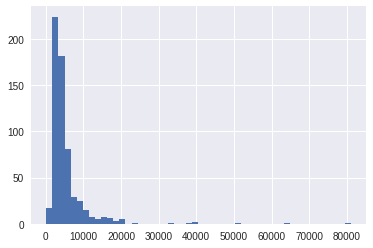

In [0]:
#Check for outliers on numerical fields:
loan_df['ApplicantIncome'].hist(bins=50)

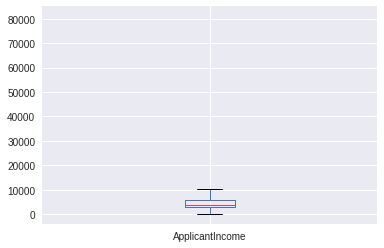

In [0]:
#boxplot 
loan_df.boxplot(column='ApplicantIncome')

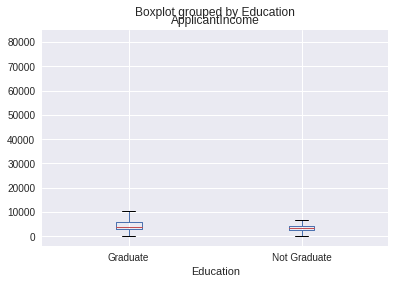

In [0]:
loan_df.boxplot(column='ApplicantIncome',by='Education')

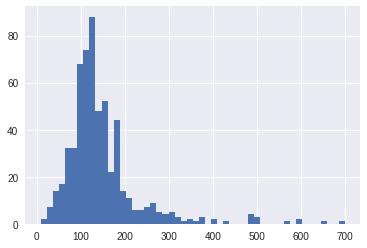

In [0]:
loan_df['LoanAmount'].hist(bins=50)

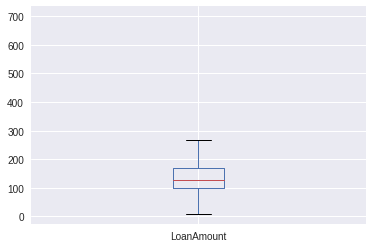

In [0]:
loan_df.boxplot(column='LoanAmount')

In [0]:
# see if Credit History alone can affect loan approval
CHist = loan_df['Credit_History'].value_counts()

In [0]:
#create pivot table
credit_hist = loan_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
credit_hist                                                              

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

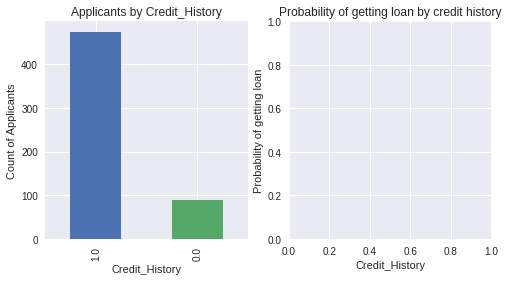

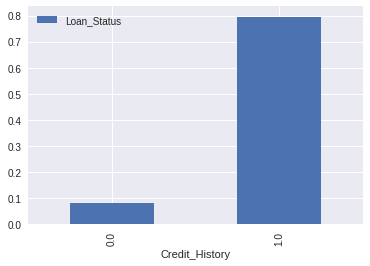

In [0]:
#plot it
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
CHist.plot(kind='bar')

ax2 = fig.add_subplot(122)
credit_hist.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

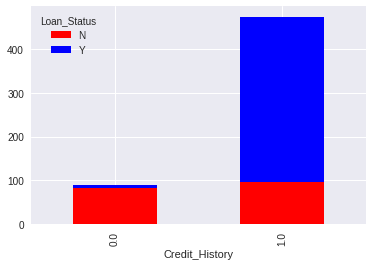

In [0]:
#plot the stacked chart using Credit History and Loan_Status
temp3 = pd.crosstab(loan_df['Credit_History'], loan_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

In [0]:
pv = loan_df.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
pv

,Gender
Credit_History,
0.0,0.197674
1.0,0.180258


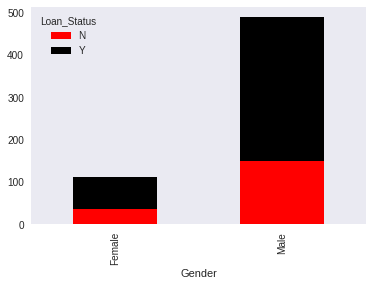

In [0]:
#combine the above in a stacked chart
stack_chart = pd.crosstab(loan_df['Gender'], loan_df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['red','black'], grid=False)

In [0]:
# Data wrangling
#check for null values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
#fill the missing values of loanamount by mean 
loan_df.LoanAmount = loan_df.LoanAmount.fillna(loan_df.LoanAmount.mean())
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
loan_df['Self_Employed'].value_counts(ascending=True)


Yes     82
No     500
Name: Self_Employed, dtype: int64

In [0]:
#since *no* has around 500 entries(82%) so, we will fill the missing values of this column with "No"
loan_df.Self_Employed = loan_df.Self_Employed.fillna('No')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


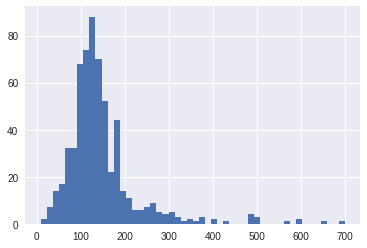

In [0]:
loan_df['LoanAmount'].hist(bins=50)

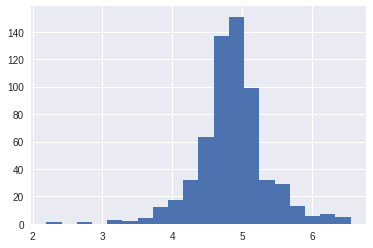

In [0]:
#log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
loan_df['LoanAmount_log'] = np.log(loan_df['LoanAmount'])
loan_df['LoanAmount_log'].hist(bins=20)

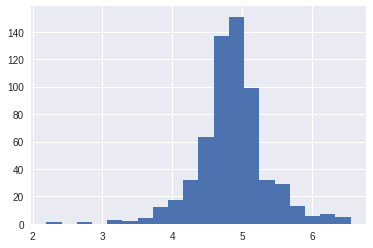

In [0]:
#decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), we can add CoApplicantIncome to compensate the value 
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df['TotalIncome_log'] = np.log(loan_df['TotalIncome'])
loan_df['LoanAmount_log'].hist(bins=20)

In [0]:
loan_df['Capacity%'] = ((loan_df['LoanAmount'] / loan_df['TotalIncome']) *100).astype(float) #capacity of each applicant of how well he/she is suited to pay back his loan.
loan_df['Capacity%'].head()

0    2.503200
1    2.101461
2    2.200000
3    2.428658
4    2.350000
Name: Capacity%, dtype: float64

In [0]:
#males are around 81%, so we fill missing values with "male"
df.Gender = df.Gender.fillna('Male')

In [0]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)

In [0]:
#check for null values again
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
Capacity%            0
dtype: int64

In [0]:
#to build and train the model using scikit, scikit needs all input to numerical values,hence we will convert all categorical/text values using scikit library LabelEncoder function
from sklearn.preprocessing import LabelEncoder
var_fields= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_fields:
    loan_df[i] = le.fit_transform(loan_df[i])
loan_df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Capacity%            float64
dtype: object

In [0]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_splits=6)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [0]:
#Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 80.945%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: ignored

In [0]:
#use more inputs
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 80.945%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: ignored

In [0]:
#using Decision Tree
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 80.945%


TypeError: ignored

In [0]:
model = DecisionTreeClassifier()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 100.000%


TypeError: ignored

In [0]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 100.000%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


TypeError: ignored

In [0]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 69.544%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


TypeError: ignored

In [95]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Dependents    0.428858
Education     0.201530
Married       0.194842
Gender        0.174770
dtype: float64


In [96]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, loan_df,predictor_var,outcome_var)

Accuracy : 82.736%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


TypeError: ignored